In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

In [2]:
def h(f, f1,x):
    return f(x)/f1(x)
def g(f, f1, f2, x):
    return (((f1(x))**2)-(f(x))*f2(x))/((f1(x))**2)

def modifiedNewtonRaphson(f,f1,f2, a,e,N=MaxIterations):

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)

    print('\n\n*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    data =[]            # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph
    
    step = 1

    while step <= N:
        if g(f, f1, f2, x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - h(f, f1,x0)/g(f, f1, f2, x0)
        
        accuracyReached = abs(x1-x0)
        
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])
        
        print(f'Iteration = {step:3}, x0 = {x0:.6f}   x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
        
        # Adding data in data list which was created for plotting table
        data.append([step,x0,x1,f(x1)])

        if(accuracyReached < e or abs(f(x1)) < e):
            print("\nFinal Root Found:")
            print(f'Iteration = {step:3}, x0 = {x0:.6f}   x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
            print(f'Required root is: {x1:3.6f}')
            break

        x0 = x1
        step = step + 1     # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)

    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy,table

In [3]:
# Defining Function
def f(x):
    q = cos(x) - x*exp(x)
    return q

def f1(x):
    return -sin(x) - x*exp(x) - exp(x)

def f2(x):
    return -cos(x) - x*exp(x) -exp(x) - exp(x)

# Initial Guesses and accuracy
x0 = 0.0

e = 0.001



*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.000000   x1 = 0.250000   f(x1) = 0.647906 
Iteration =   2, x0 = 0.250000   x1 = 0.452357   f(x1) = 0.188308 
Iteration =   3, x0 = 0.452357   x1 = 0.514111   f(x1) = 0.011060 
Iteration =   4, x0 = 0.514111   x1 = 0.517746   f(x1) = 0.000034 

Final Root Found:
Iteration =   4, x0 = 0.514111   x1 = 0.517746   f(x1) = 0.000034 
Required root is: 0.517746


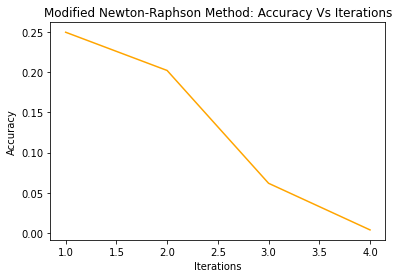

+-----------+---------------------+---------------------+-----------------------+
| Iteration |          x0         |          x1         |         f(x1)         |
+-----------+---------------------+---------------------+-----------------------+
|     1     |         0.0         |         0.25        |   0.6479060675387094  |
|     2     |         0.25        | 0.45235711613633345 |   0.1883079619704996  |
|     3     | 0.45235711613633345 |  0.5141106338262553 |  0.011059972837116239 |
|     4     |  0.5141106338262553 |  0.5177462180775807 | 3.390599238339842e-05 |
+-----------+---------------------+---------------------+-----------------------+


In [4]:
mn_acc,Modified_NR_table = modifiedNewtonRaphson(f,f1,f2,x0,e)
mn_i = []
mn_a = []
for i in mn_acc:
    mn_i.append(i[0])
    mn_a.append(i[1])
plt.title("Modified Newton-Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(mn_i,mn_a,color = 'orange')
plt.show()
print(Modified_NR_table)